## Importar librerías

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

d:\DRIVE_PORTATIL2\Portatil2\Desktop\Personal\PLATZI\Formacion_git\Formacion\Manejo de datos Faltantes\env_ma\lib\site-packages\janitor\utils.py:84: FutureWarning: PandasArray has been renamed NumpyExtensionArray. Use that instead. This alias will be removed in a future version.
  @_expand_grid.register(pd.arrays.PandasArray)


## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [6]:
nhanes_raw_df=(
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(case_type = "snake")
)

nhanes_raw_df.shape

(8366, 197)

## Procesar los datos de NHANES

In [31]:
nhanes_df = (
    nhanes_raw_df
    .select_columns(
        "general_health_condition",
        "age_in_years_at_screening",
        "gender",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "total_cholesterol_mgdl"
    )
    .rename_columns(
        {
           "age_in_years_at_screening":"age" ,
           "current_selfreported_height_inches": "height",
            "current_selfreported_weight_pounds": "weight",
            "doctor_told_you_have_diabetes":"diabetes",
            "60_sec_pulse30_sec_pulse2":"pulse",
            "total_cholesterol_mgdl":"total_choresterol"
        }
    )
    .replace(
        {
            "height" : {
                9999:np.nan,
                7777:np.nan
            },

            "weight" : {
                9999:np.nan,
                7777:np.nan
            },

            "diabetes" : {
                "Borderline":np.nan
              
            }
        }
    )
    .missing.sort_variables_by_missingness()
    .dropna(
        subset = ["diabetes"],
        how = "any"
    )
    .transform_column(
        column_name = "diabetes",
        function= lambda s: s.astype(int),
        elementwise = False
    )
)
nhanes_df

,height,weight,general_health_condition,total_choresterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Female
93704.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Male
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,4.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


## Visualizar los valores faltantes

<Axes: >

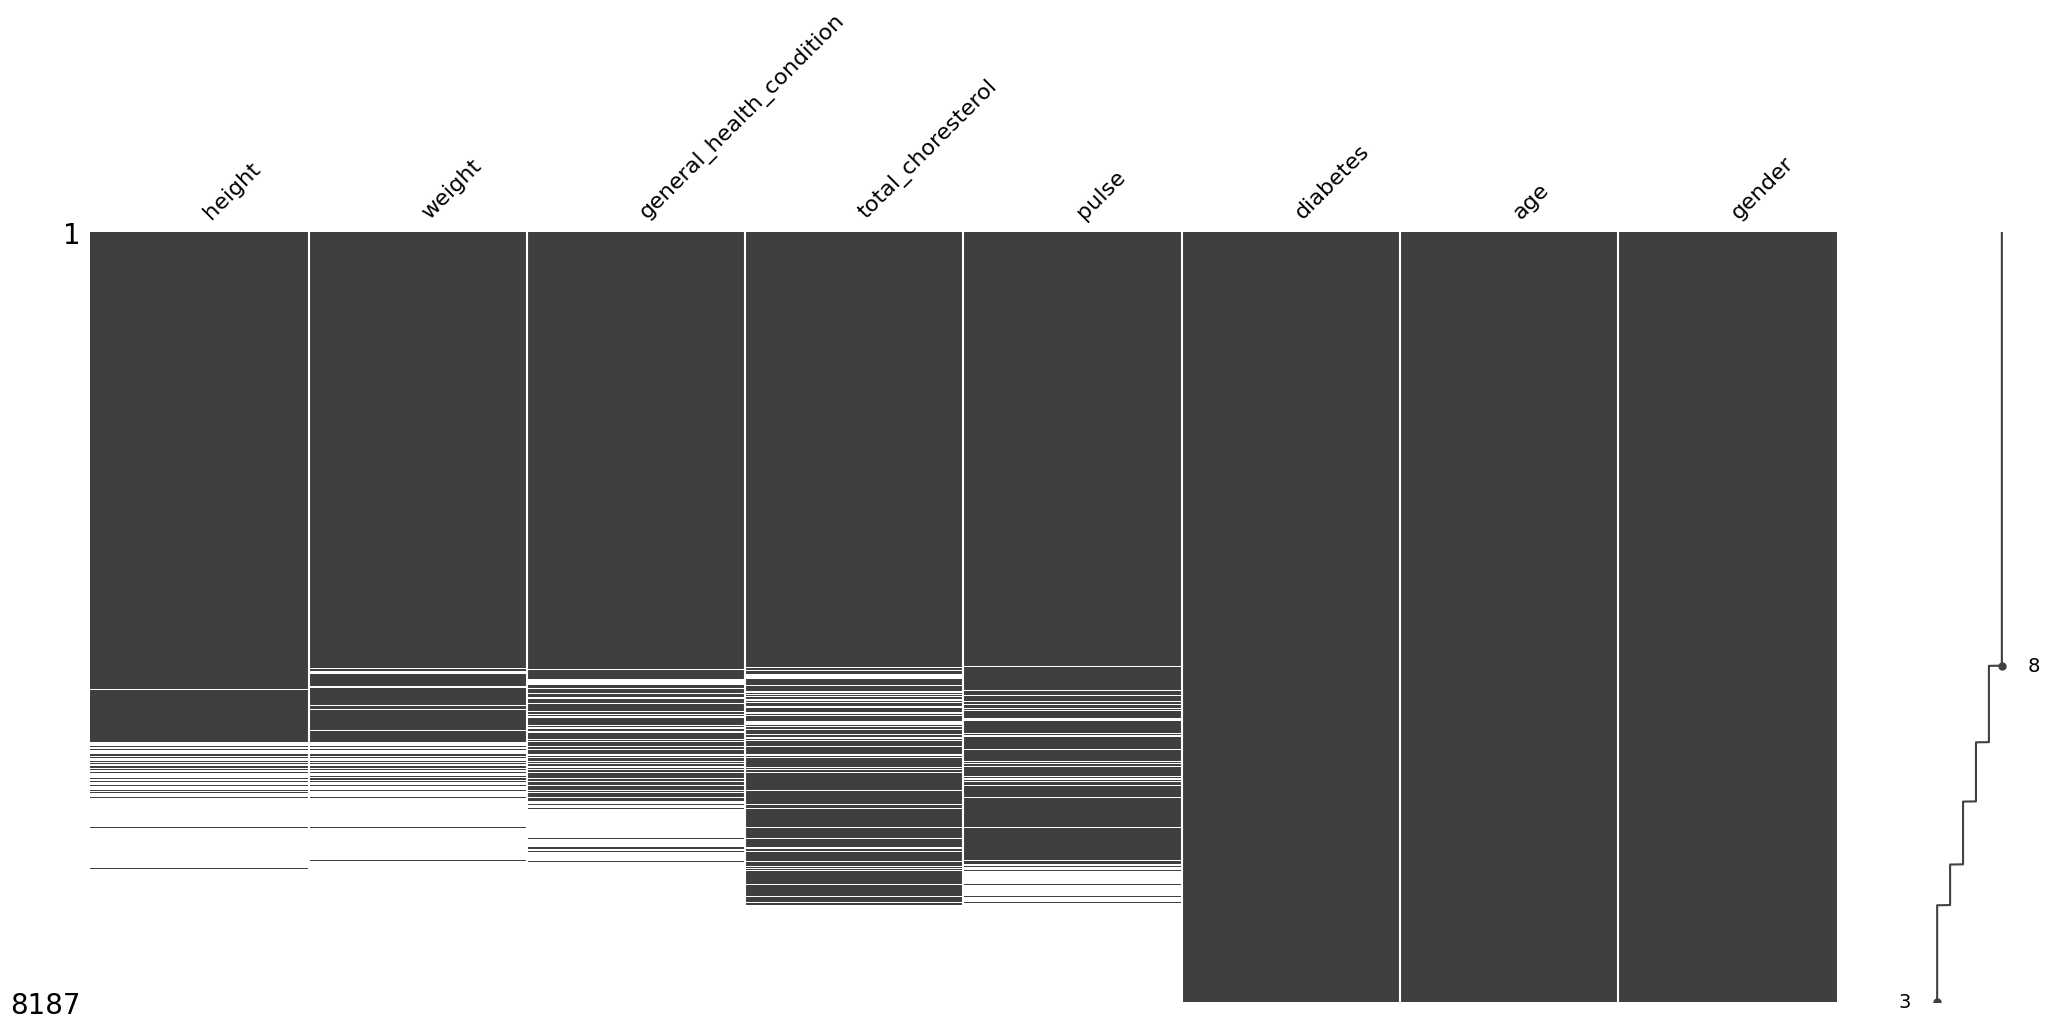

In [32]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")
)

d:\DRIVE_PORTATIL2\Portatil2\Desktop\Personal\PLATZI\Formacion_git\Formacion\Manejo de datos Faltantes\env_ma\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
d:\DRIVE_PORTATIL2\Portatil2\Desktop\Personal\PLATZI\Formacion_git\Formacion\Manejo de datos Faltantes\env_ma\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Th

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

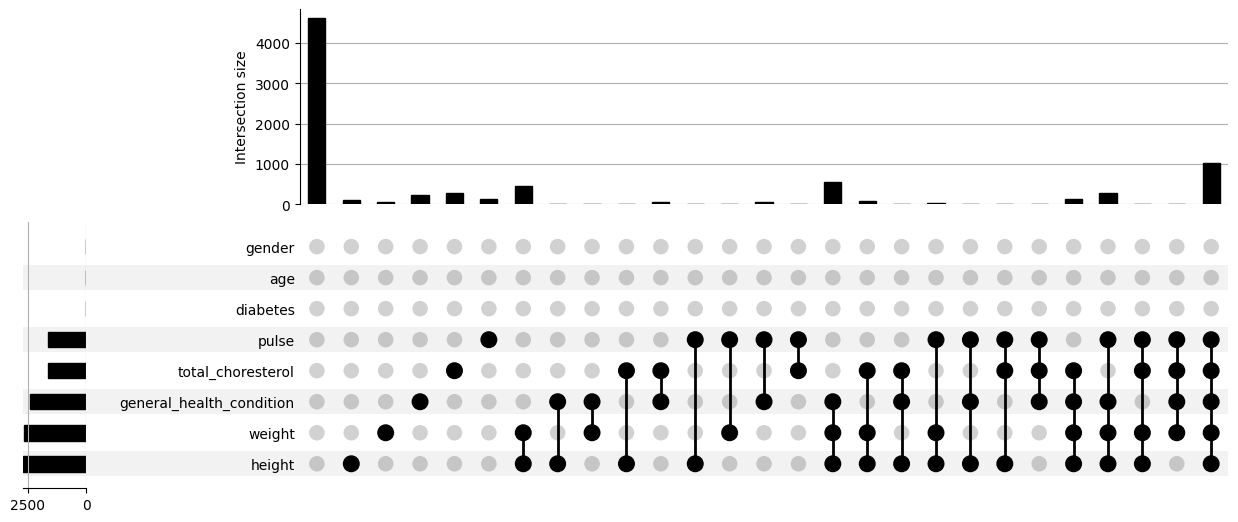

In [33]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

<Axes: >

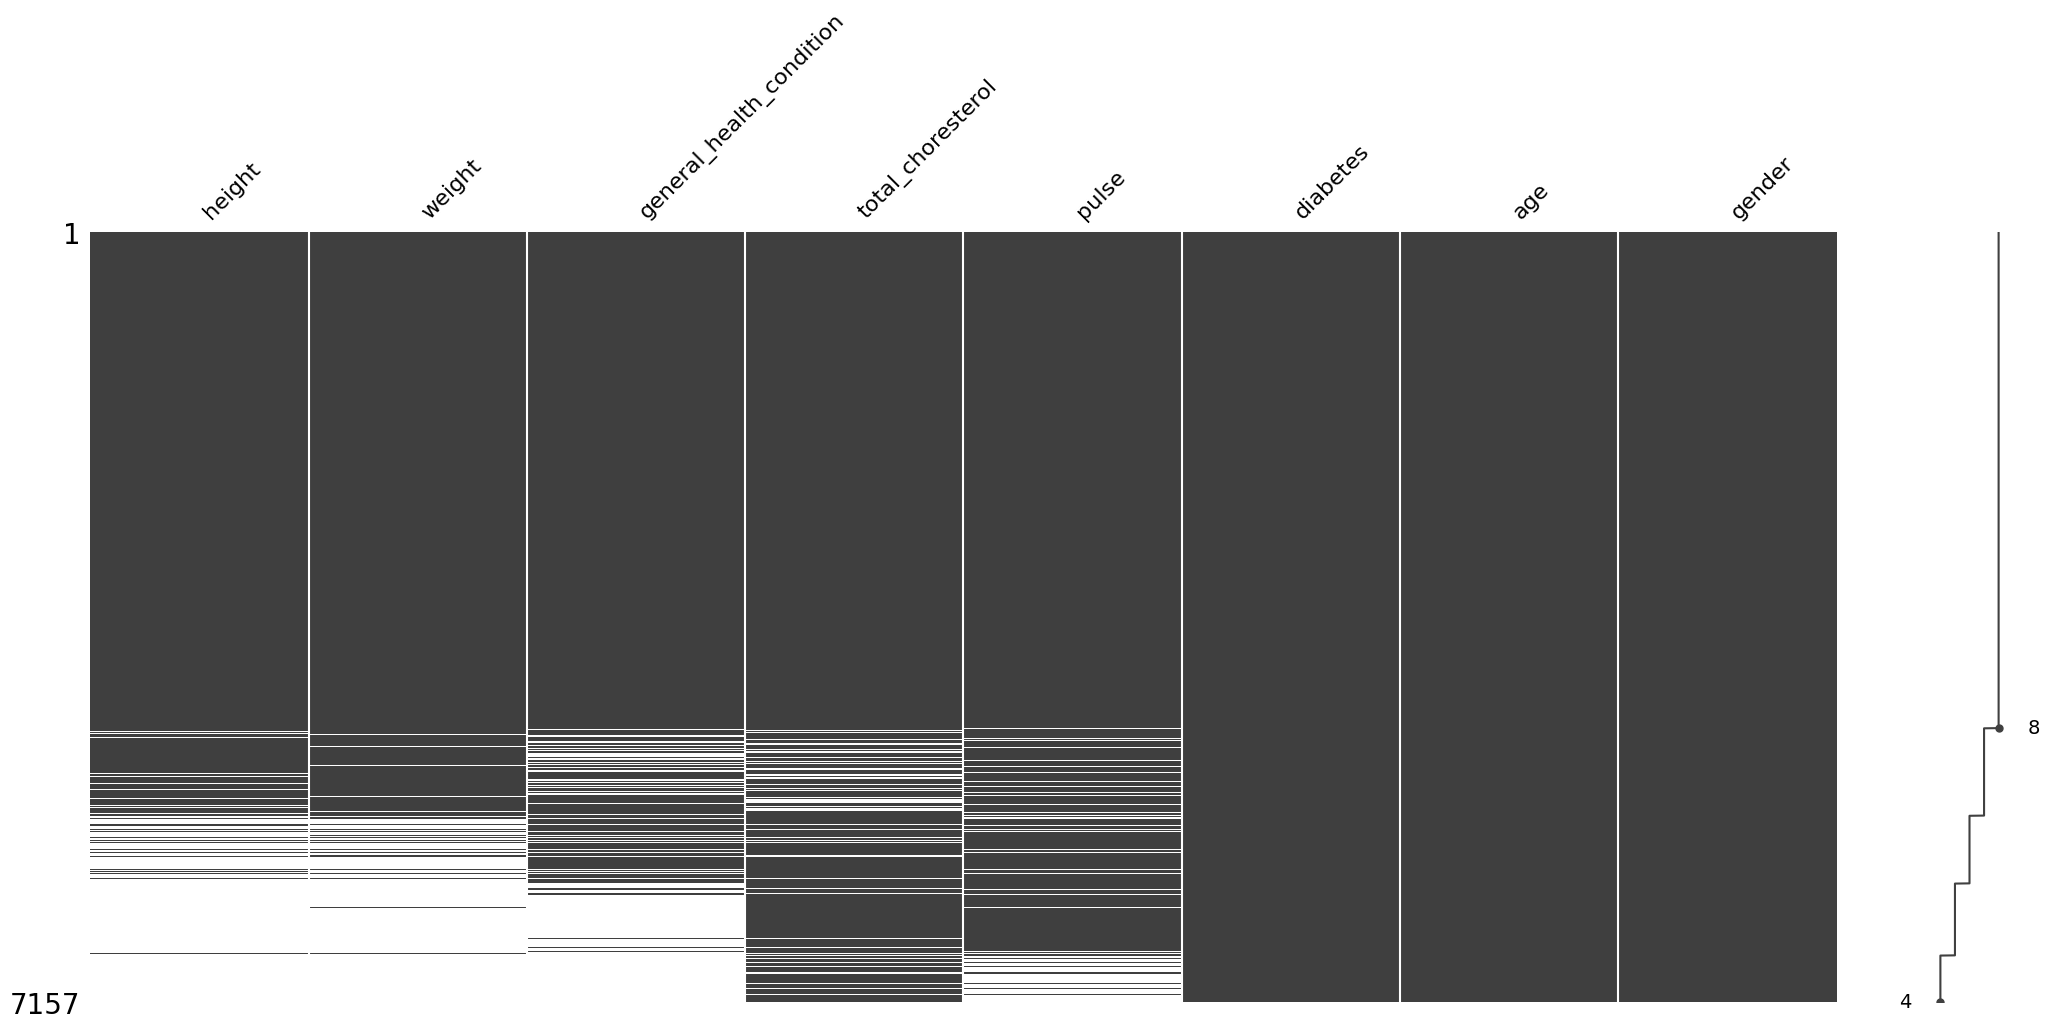

In [35]:
(
    nhanes_df
    .dropna(
        subset=["pulse", "total_choresterol", "general_health_condition","weight","height"],
        how="all"
    )
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix,sort="descending")
)   

## Eliminar valores faltantes

In [36]:
nhanes_df=(
    nhanes_df
    .dropna(
        subset=["pulse", "total_choresterol", "general_health_condition","weight","height"],
        how="all"
    )
    .missing.sort_variables_by_missingness()
)  
nhanes_df.shape

(7157, 8)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>